# Emotional Journey on *Submarine*: A Bilingual Sentiment Analysis of The Marías

### Introduction
For my final project, I completed a sentiment analysis on the lyrics of Submarine by The Marías, a pop band from Los Angeles known for their bilingual (English and Spanish) music. The goal of this project is to explore the emotional journey throughout the album and address the following questions:

- Do The Marías’ English and Spanish lyrics differ in their emotional tone?

- What can be drawn about the emotional journey of *Submarine*?

To investigate this, I performed zero-shot classification on each lyric using a multilingual transformer model. The outputs are three sentiment scores: positivo, negativo, and neutral, which were used to analyze emotional trends across songs and languages. My process included tokenizing the lyrics, applying sentiment analysis through my model, and visualizing the results.

This step reads in the Submarine Dta .csv, extracting song titles and lyrics into separate lists, and performs basic text cleaning by removing unnecessary punctuation and whitespace with regex.

In [ ]:
import csv
import re

titles = []
lyrics = []

with open('Submarine Data.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file) 
    for row in reader:
        title = row['Title']
        text = row['Lyrics']


        text = re.sub(r'[\"\(\)]', '', text)
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()

        titles.append(title)
        lyrics.append(text)

Here, I load xlm-roberta-large-xnli-anli, a pre-trained multilingual transformer model ideal for analyzing both English and Spanish. It uses a zero-shot classification pipeline to assign sentiment labels ("positivo", "negativo", "neutral") to each index in the lyrics list.

In [2]:
# pip install transformers
# pip install ipywidgets
# pip install jupyterlab_widgets
# pip install tiktoken
# pip install sentencepiece

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

classifier = pipeline("zero-shot-classification", model="vicgalle/xlm-roberta-large-xnli-anli")

tokenizer = AutoTokenizer.from_pretrained("vicgalle/xlm-roberta-large-xnli-anli")
model = AutoModelForSequenceClassification.from_pretrained("vicgalle/xlm-roberta-large-xnli-anli")

2025-05-02 12:45:27.258531: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 12:45:31.588699: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 12:45:33.417744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746189936.215065    2497 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746189936.857449    2497 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746189942.982474    2497 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

This loop runs sentiment analysis on each lyric, storing the scores for each label (positivo, negativo, neutral) and identifying the highest-scoring (top) sentiment label. The resulting DataFrame provides a view of how each song scored across the sentiment spectrum, with the probabilities of each label shown; the closer to 1, the higher it is to be that label; the closer to 0, the lower the probability of the input being under that label.

In [3]:
import pandas as pd

data = []
candidate_labels = ["positivo", "negativo", "neutral"]

for i in range(len(lyrics)):
    sequence_to_classify = lyrics[i]
    result = classifier(sequence_to_classify, candidate_labels)
    best_label = result['labels'][result['scores'].index(max(result['scores']))]

    data.append({
        'Song': titles[i],
        'Lyrics': sequence_to_classify,
        'Positivo': result['scores'][result['labels'].index('positivo')],
        'Negativo': result['scores'][result['labels'].index('negativo')],
        'Neutral': result['scores'][result['labels'].index('neutral')],
        'Top Label': best_label
    })

df = pd.DataFrame(data)
df = df.round(3)
pd.set_option('display.width', 1000)
print(df)

                       Song                                             Lyrics  Positivo  Negativo  Neutral Top Label
0                      Ride  We can make a movie We can take our time intro...     0.341     0.063    0.596   neutral
1                  Hamptons  Weekend in the hamptons All the wives were dre...     0.051     0.801    0.148  negativo
2                      Echo  I wonder what it's like to be alone If you won...     0.363     0.380    0.258  negativo
3            Run Your Mouth  When we talk about, everything that happened W...     0.352     0.341    0.307  positivo
4                 Real Life  Facetiming every night I'll hide just to see y...     0.510     0.250    0.240  positivo
5                      Blur  The sun looks so pretty here Inside the room t...     0.588     0.264    0.149  positivo
6                  Paranoia  Ooh, it's Valentine's Day in the city Riding i...     0.401     0.355    0.244  positivo
7               Lejos de Ti  El frío, la noche Siempre m

We can clarify these positivo, negativo, scores through the visual below with the each label's probability scores fluctuating from song to song.

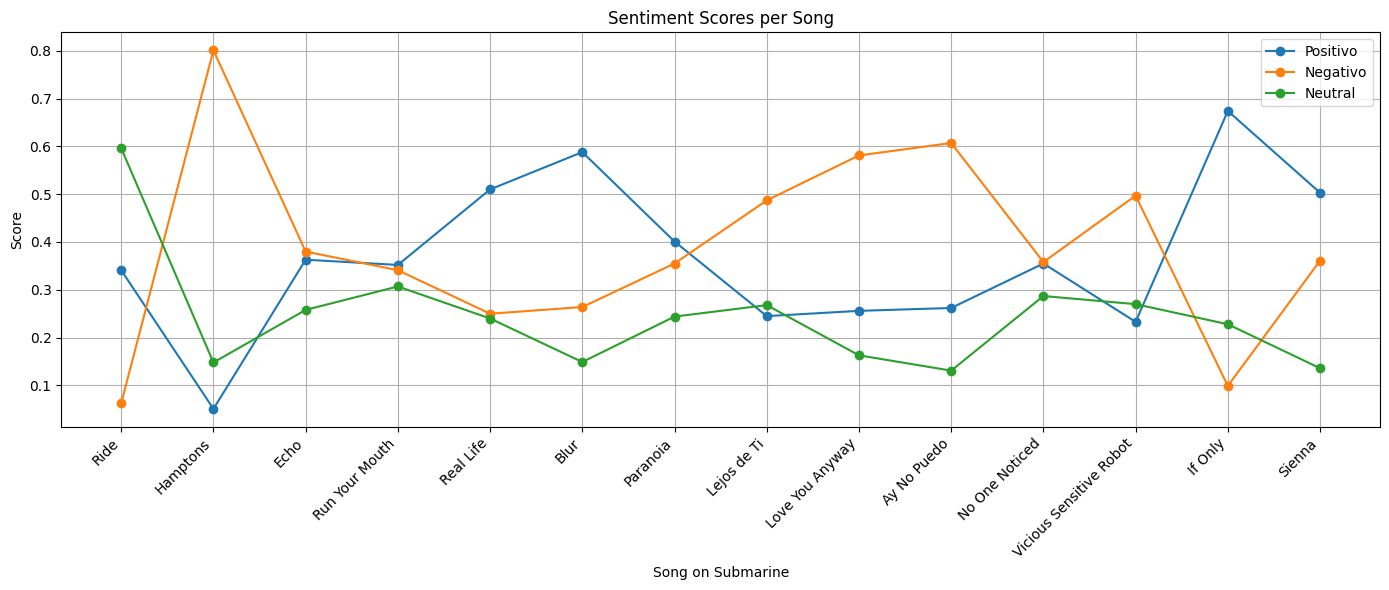

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(df.index, df['Positivo'], label='Positivo', marker='o')
plt.plot(df.index, df['Negativo'], label='Negativo', marker='o')
plt.plot(df.index, df['Neutral'], label='Neutral', marker='o')

plt.title('Sentiment Scores per Song')
plt.xlabel('Song on Submarine')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(ticks=df.index, labels=titles, rotation=45, ha='right')

plt.tight_layout()
plt.show()

This sorted table organizes the songs by dominant sentiment, then by intensity. It’s a useful summary to spot which lyrics were most emotionally charged and whether there are groupings based on language. From what I notice here, Lejos de Ti and Ay No Puedo,the only two fully Spanish songs, are grouped under negativo.

In [5]:
df['Top Score'] = df[['Positivo', 'Negativo', 'Neutral']].max(axis=1)
df_sorted = df.sort_values(by=['Top Label', 'Top Score'], ascending=[True, False])
print(df_sorted[['Song','Lyrics', 'Top Label', 'Top Score']])

                       Song                                             Lyrics Top Label  Top Score
1                  Hamptons  Weekend in the hamptons All the wives were dre...  negativo      0.801
9               Ay No Puedo  Ay, amor ay, amor Te fuiste sin decir adiós Po...  negativo      0.607
8           Love You Anyway  Wake up wake up Just to see your face just to ...  negativo      0.581
11  Vicious Sensitive Robot  If I need to be true Send my love and I'll sen...  negativo      0.497
7               Lejos de Ti  El frío, la noche Siempre me acuerdo de ti Mil...  negativo      0.487
2                      Echo  I wonder what it's like to be alone If you won...  negativo      0.380
10           No One Noticed  Maybe I Lost my mind No one noticed No one not...  negativo      0.358
0                      Ride  We can make a movie We can take our time intro...   neutral      0.596
12                  If Only  Even when I dream You are next to me I can't f...  positivo      0.674


This visualization makes it easy to identify the emotional "peaks" of each track and categorize them by top label and intensity of probability. Color coding of the label allows for instant recognition of which tracks lean positively, negatively, or neutrally.

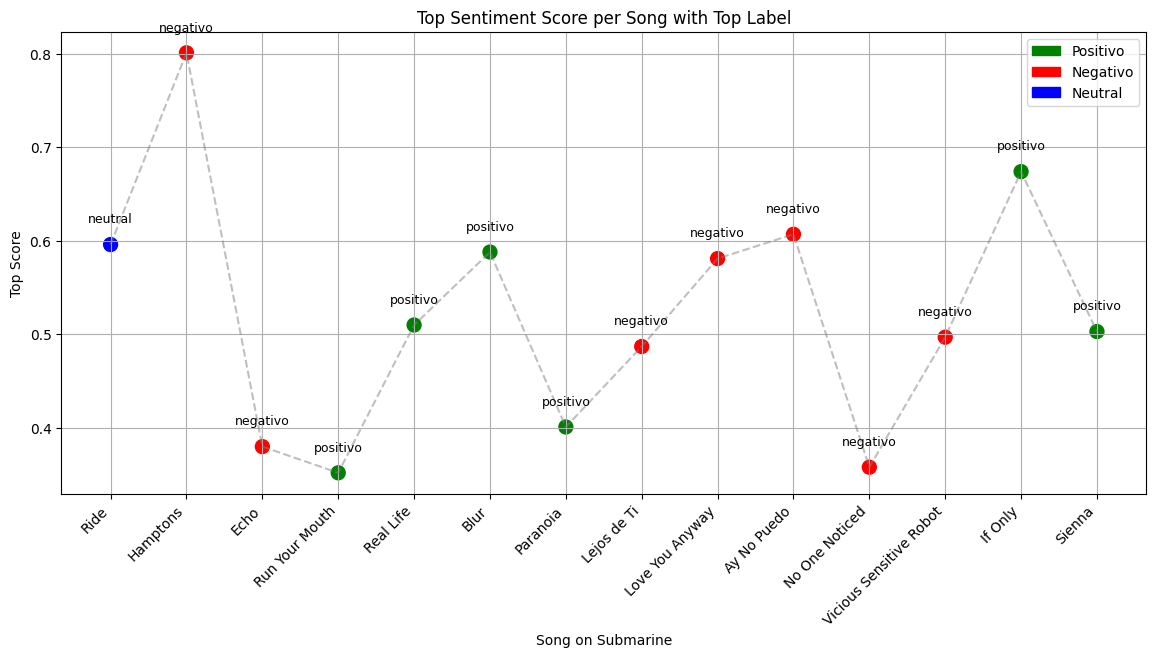

In [6]:
import matplotlib.pyplot as plt

top_scores = df[['Positivo', 'Negativo', 'Neutral']].max(axis=1)

colors = df['Top Label'].map({
    'positivo': 'green',
    'negativo': 'red',
    'neutral': 'blue'
})

plt.figure(figsize=(14, 6))
plt.scatter(df.index, top_scores, c=colors, s=100)
plt.plot(df.index, top_scores, color='gray', linestyle='--', alpha=0.5)  

for i in range(len(df)):
    plt.text(df.index[i], top_scores[i] + 0.02, df['Top Label'][i], 
             ha='center', va='bottom', fontsize=9)

plt.title('Top Sentiment Score per Song with Top Label')
plt.xlabel('Song on Submarine')
plt.ylabel('Top Score')
plt.grid(True)
plt.xticks(ticks=df.index, labels=titles, rotation=45, ha='right')

import matplotlib.patches as mpatches
legend_labels = [
    mpatches.Patch(color='green', label='Positivo'),
    mpatches.Patch(color='red', label='Negativo'),
    mpatches.Patch(color='blue', label='Neutral')
]
plt.legend(handles=legend_labels)

plt.show()


### Analysis



The The album’s 14 songs exhibit a near-equal distribution of positive (6 tracks) and negative (8 tracks) dominant labels.

Spanish-language tracks ("Lejos de Ti", "Ay No Puedo") both received **negative** dominant labels, with particularly low positive sentiment scores (0.245 and 0.262 respectively). This contrasts with English tracks showing greater emotional diversity – from "If Only"'s intensely positive tone (0.674 positivity) to "Hamptons" stark negativity (0.801). The pattern suggests Spanish lyrics may serve as an emotional intensifier for melancholy themes in The Marías' work, though the limited sample size warrants cautious interpretation.

Lyrics, however, can tell a different story from what's in the music. I think that some tracks defy their dominant labels considering this. "Paranoia" (labeled positive) juxtaposes the romance of Valentine's Day amidst Maria's parter, who doubts her loyalty, therefore, "paranoid." "Run Your Mouth" (labeled positive) has accusatory lyrics ("You'd just call me out, call me when I'm distant / Always run your mouth, I don't wanna listen"). It's interesting how both of these lyrics are paired with an upbeat, melodic resolution, embodying the entire album's theme of conflicted intimacy; perhaps a different model would've been able to identify the metaphors in these lyrics.

This analysis suggests The Marías use language selection as an emotional filter rather than absolute determinant, with Spanish functioning as a cultural amplifier for specific melancholic themes that the English language can't easily capture. The frequent sentiment overlaps (7 tracks show <0.15 difference between top two scores) mirror the group's signature style of ambiguity, where linguistic choices create emotional tension rather than resolution.